In [1]:
import warnings
import os
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

# Clustering

In [2]:
import pandas as pd

DATA = '../dados/customers_new_features_and_drop.csv'

df = pd.read_csv(DATA)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,45-60,1617,1529,0,0.0,0,0.0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,45-60,27,21,2,1.0,0,0.0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,45-60,776,734,0,0.0,0,0.0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1.0,0,0.0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1.0,0,0.0,14


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [4]:
numerical_features = df.select_dtypes(include="number").columns
len(numerical_features)

32

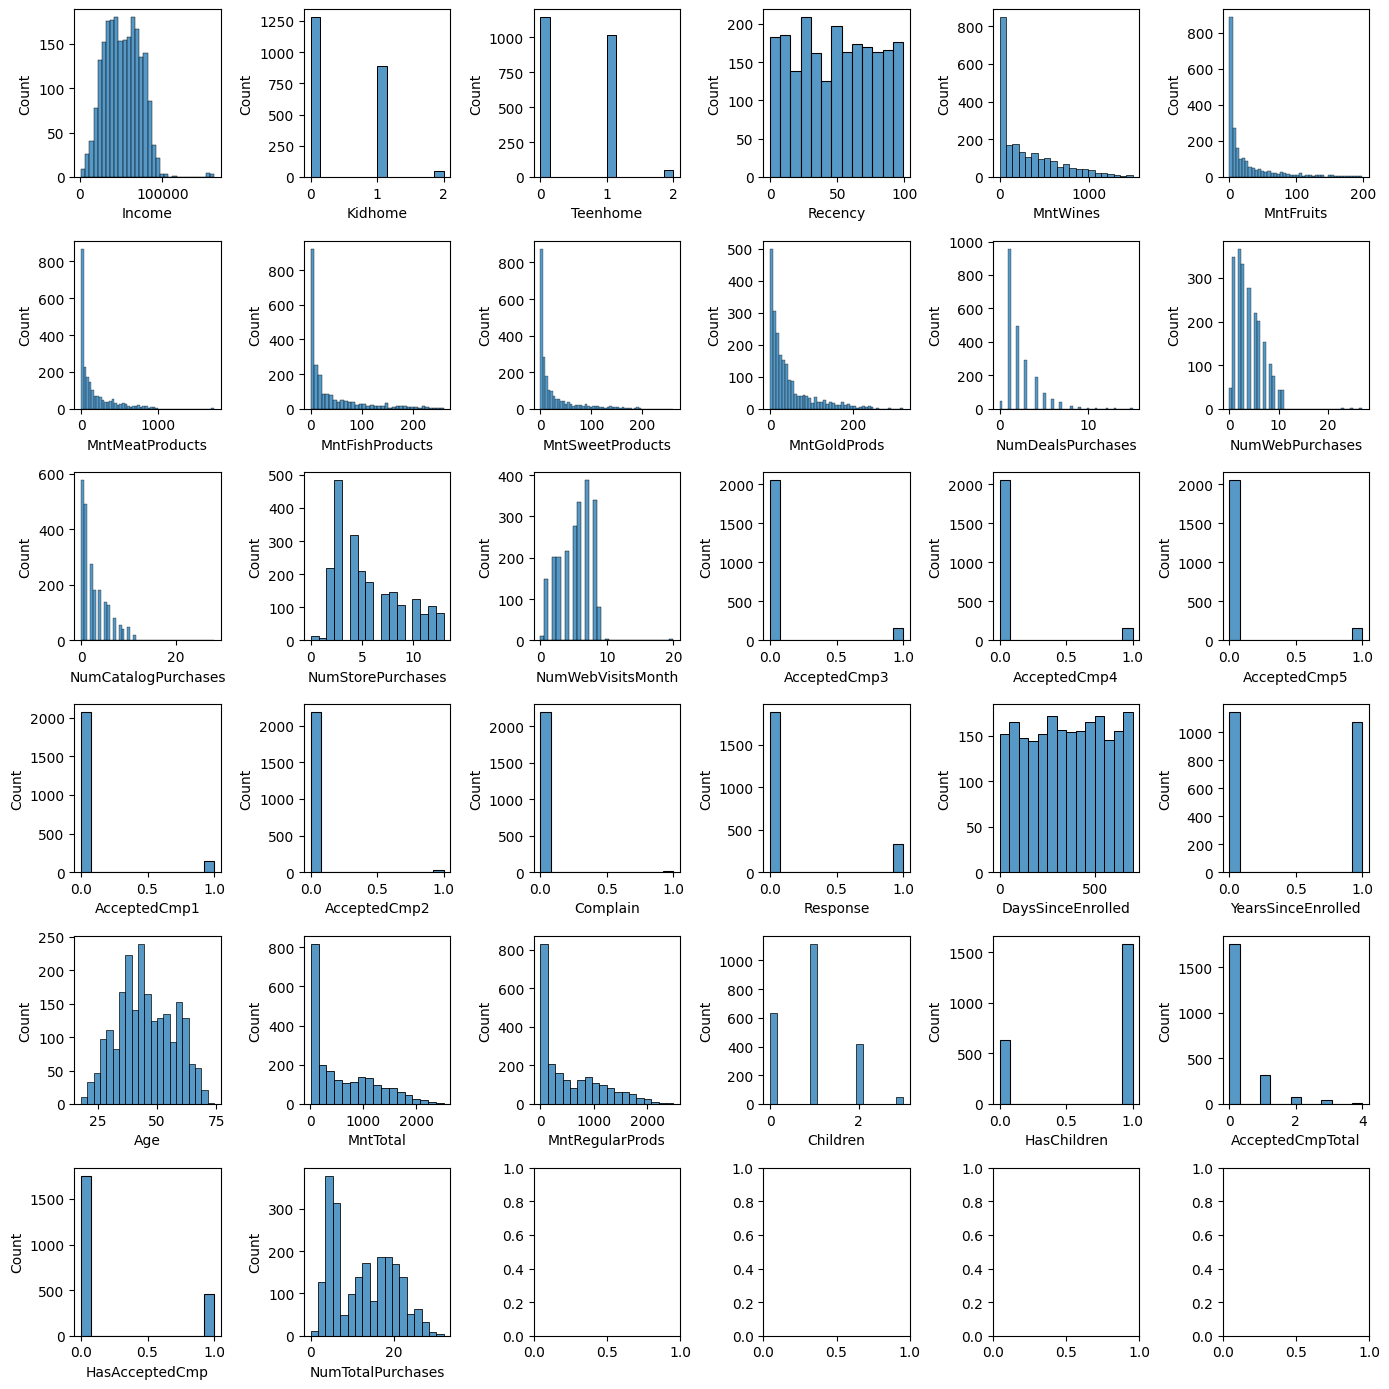

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(14,14), tight_layout=True)

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.histplot(x=feature, ax=ax, data=df)

plt.show();

In [6]:
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
]

standard_cols =[
    "Income",
    "Age",
]

power_cols = df.columns[
    df.columns.str.startswith("Mnt") | df.columns.str.startswith("Num")
].tolist()


minmax_cols = [
    col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

In [8]:
preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.31419627,
         1.30916334,  1.21940234],
       [ 0.        ,  0.        ,  1.        , ..., -1.44350985,
        -1.45057341, -1.30711352],
       [ 0.        ,  0.        ,  1.        , ...,  0.65795633,
         0.68728766,  1.02271212],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.0676599 ,
         1.10774599,  0.81428686],
       [ 0.        ,  0.        ,  0.        , ...,  0.72774532,
         0.73808339,  1.12241509],
       [ 0.        ,  0.        ,  0.        , ..., -0.44612568,
        -0.42375395, -0.50794079]])

In [9]:
preprocessing.get_feature_names_out()

array(['one-hot__Education_2n Cycle', 'one-hot__Education_Basic',
       'one-hot__Education_Graduation', 'one-hot__Education_Master',
       'one-hot__Education_PhD', 'one-hot__Marital_Status_Partner',
       'one-hot__Marital_Status_Single', 'one-hot__AgeGroup_18-30',
       'one-hot__AgeGroup_31-45', 'one-hot__AgeGroup_45-60',
       'one-hot__AgeGroup_61+', 'one-hot__HasChildren_0.0',
       'one-hot__HasChildren_1.0', 'one-hot__HasAcceptedCmp_0.0',
       'one-hot__HasAcceptedCmp_1.0', 'one-hot__AcceptedCmp1_0',
       'one-hot__AcceptedCmp1_1', 'one-hot__AcceptedCmp2_0',
       'one-hot__AcceptedCmp2_1', 'one-hot__AcceptedCmp3_0',
       'one-hot__AcceptedCmp3_1', 'one-hot__AcceptedCmp4_0',
       'one-hot__AcceptedCmp4_1', 'one-hot__AcceptedCmp5_0',
       'one-hot__AcceptedCmp5_1', 'one-hot__Complain_0',
       'one-hot__Complain_1', 'one-hot__Response_0',
       'one-hot__Response_1', 'one-hot__Kidhome_0', 'one-hot__Kidhome_1',
       'one-hot__Kidhome_2', 'one-hot__Teenhome_0

In [10]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head(4)

,one-hot__Education_2n Cycle,one-hot__Education_Basic,one-hot__Education_Graduation,one-hot__Education_Master,one-hot__Education_PhD,one-hot__Marital_Status_Partner,one-hot__Marital_Status_Single,one-hot__AgeGroup_18-30,one-hot__AgeGroup_31-45,one-hot__AgeGroup_45-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProds,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.388725,1.091272,0.746207,1.334188,1.725656,-0.421872,0.702496,1.314196,1.309163,1.219402
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.973382,-0.940642,0.158507,-1.363525,-0.379079,-1.430172,-0.102583,-1.443510,-1.450573,-1.307114
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.551061,0.447232,-0.824617,1.334188,0.154062,1.240619,-0.518935,0.657956,0.687288,1.022712
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.521026,-1.045517,0.158507,-0.716552,-1.341368,-0.421872,0.304033,-1.120416,-1.063757,-0.872312


In [11]:
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]
scaled_columns_not_one_hot

Index(['standard__Income', 'standard__Age', 'minmax__Recency',
       'minmax__DaysSinceEnrolled', 'power__MntWines', 'power__MntFruits',
       'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal', 'power__MntRegularProds',
       'power__NumTotalPurchases'],
      dtype='object')

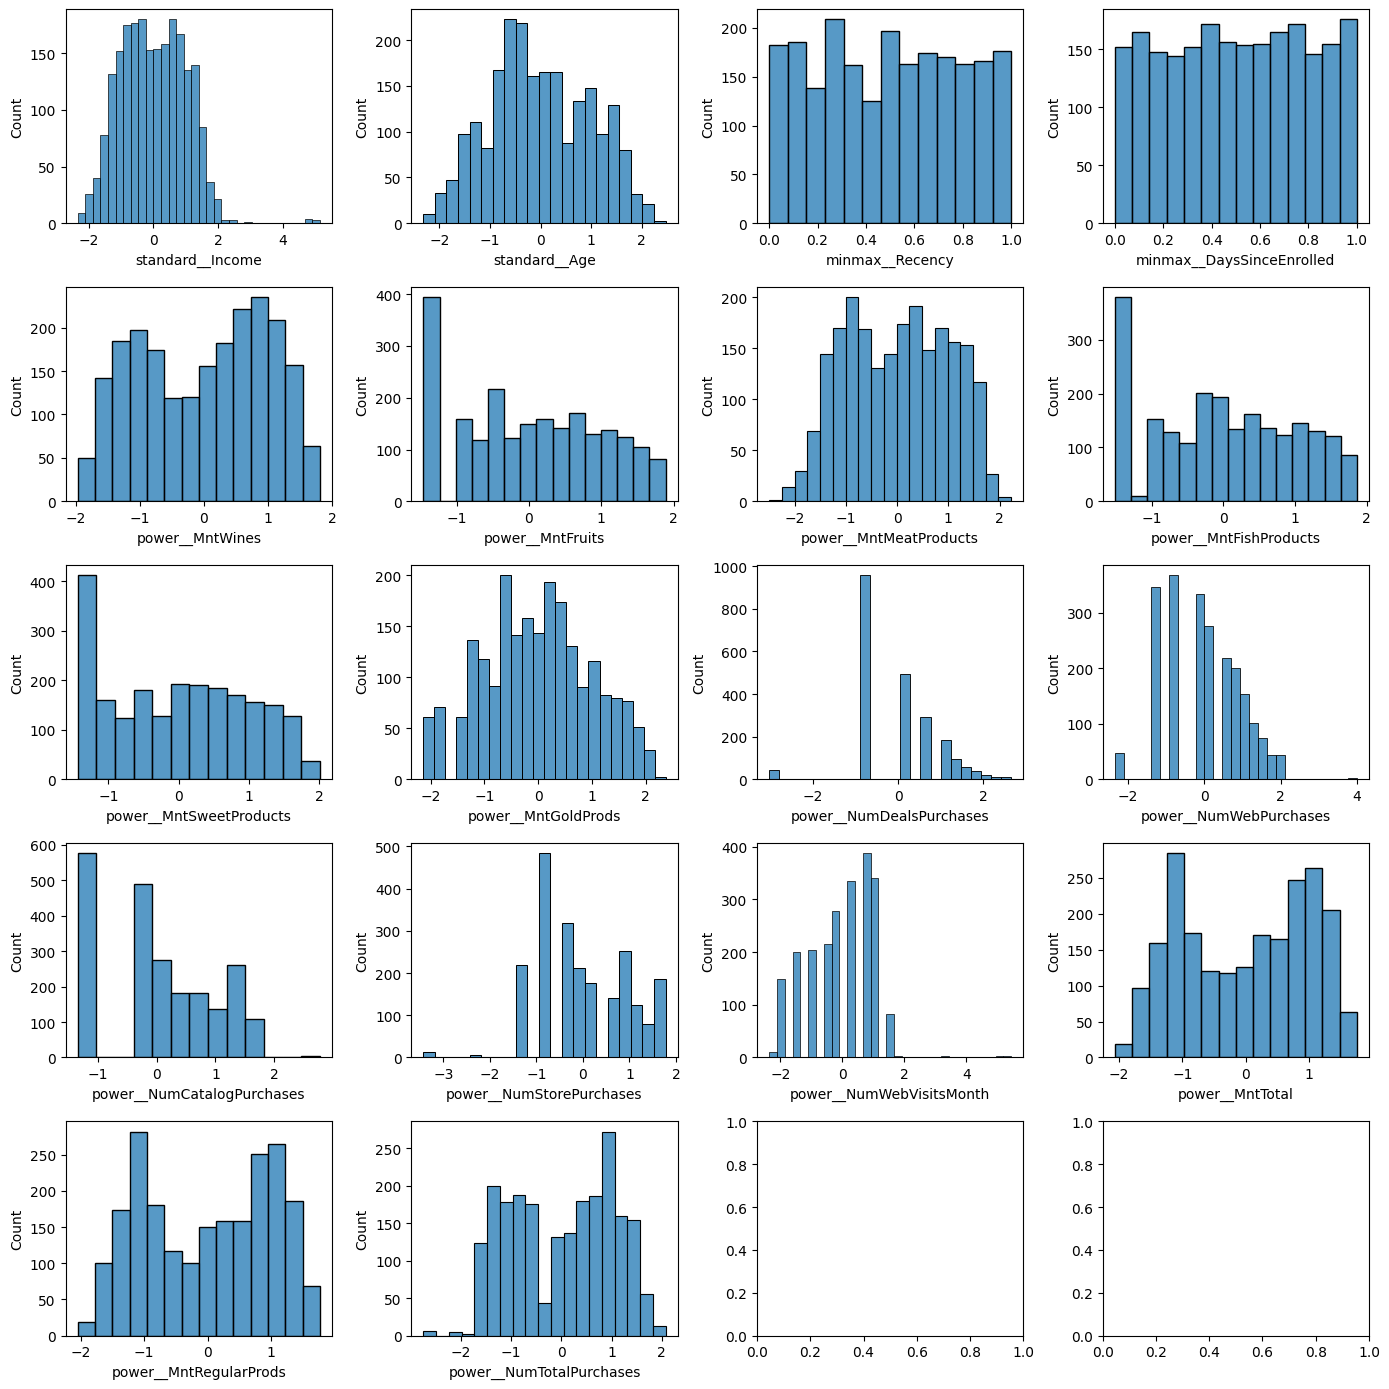

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(14,14), tight_layout=True)

for ax, feature in zip(axs.flatten(), scaled_columns_not_one_hot):
    sns.histplot(x=feature, ax=ax, data=df_scaled)

plt.show();

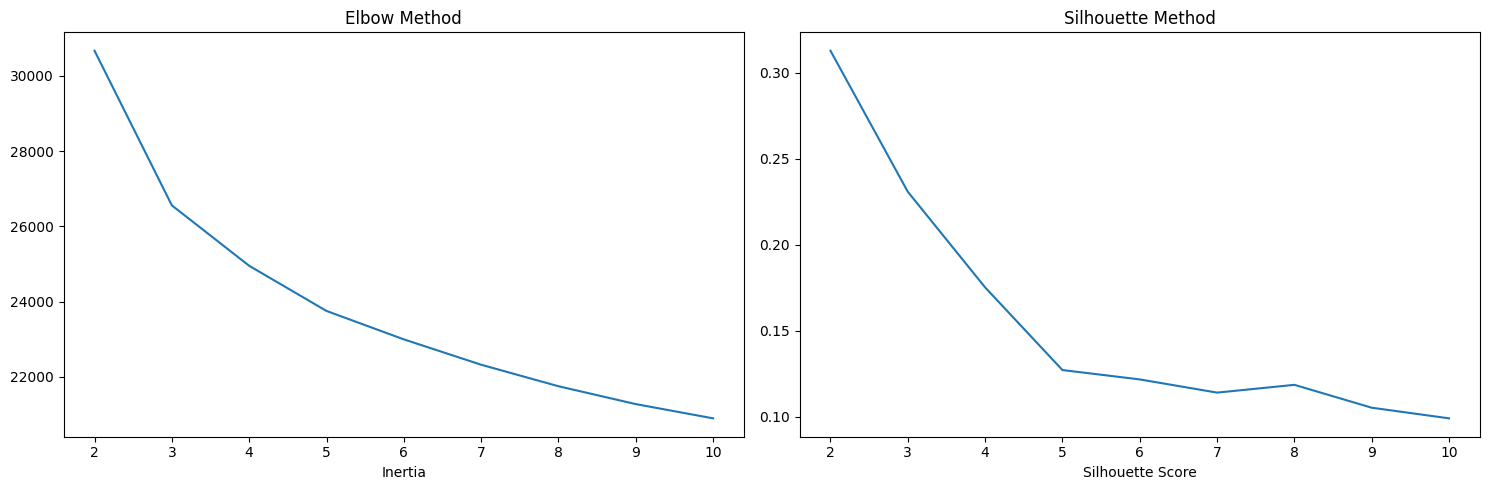

In [13]:
from funcoes_aux import graficos_elbow_silhouette

graficos_elbow_silhouette(df_scaled)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline(
    [
        ("preprocessing",preprocessing),
        ("clustering", KMeans(n_clusters=3, random_state=42,n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [15]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [16]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'Children', 'AcceptedCmpTotal']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                            

In [18]:
pipeline["clustering"].labels_

array([0, 1, 0, ..., 0, 2, 1])